# Assignment Brief de UNIT 19 - DATA STRUCTURES & ALGORITHMS

**Autor: Rubén Valverde Romero**

### Definir los tipos de datos básicos con los que trabajaremos en el AB.

### Tipos de datos empleados en el proyecto

1. lista: Representa una secuencia de nodos o vértices del grafo.

    - Ejemplo: vertices = ['A', 'B', 'C']

2. diccionario: Representa un mapa de adyacencia entre los nodos del grafo.


    - Ejemplo: grafo = {'A': ['B', 'C'], 'B': ['A', 'D'], 'C': ['A', 'F'], 'D': ['B'], 'E': ['F'], 'F': ['C', 'E']}

3. set: Representa un conjunto de nodos o vértices del grafo.


    - Ejemplo: vertices = {'A', 'B', 'C'}

4. tupla: Similar a la lista, pero inmutable.


    - Ejemplo: vertices = ('A', 'B', 'C')

5. numpy.ndarray: Representa una matriz de adyacencia entre los nodos del grafo. Tienen la misma función que los arrays normales pero son más veloces y facilitan los calculos con diversas funciones.


    - Ejemplo: grafo = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])


#### Creación de una Matriz de adyacencia y representación gráfica del grafo

Se utlizará para medir la velocidad de distintos algoritmos

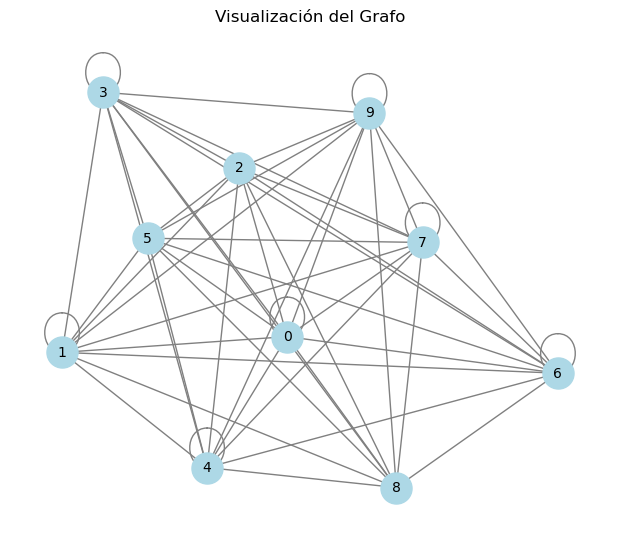

In [52]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Representación del grafo como una matriz de adyacencia
# 0 indica que no hay conexión directa entre los nodos
grafo = np.array(
    [[2, 8, 6, 2, 1, 0, 6, 9, 8, 3],
     [6, 8, 8, 9, 4, 8, 3, 7, 4, 1],
     [3, 8, 0, 8, 8, 8, 3, 9, 9, 0],
     [5, 6, 9, 9, 7, 6, 7, 9, 2, 6],
     [8, 9, 5, 1, 9, 5, 9, 1, 2, 4],
     [6, 2, 8, 6, 6, 0, 4, 5, 7, 8],
     [3, 1, 2, 2, 4, 1, 7, 4, 9, 0],
     [5, 4, 8, 1, 3, 9, 2, 6, 6, 3],
     [0, 4, 3, 1, 8, 1, 9, 3, 0, 7],
     [9, 2, 6, 9, 2, 0, 3, 9, 2, 4]])
    

# Crear un grafo desde la matriz de adyacencia
G = nx.from_numpy_array(grafo)

# Dibujar el grafo
plt.figure(figsize=(6, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Visualización del Grafo")
plt.show()


# Número de nodos en el grafo
num_nodos = grafo.shape[0]

# Inicializa la distancia al nodo origen (nodo 0) como 0 y a todos los demás nodos como infinito
distancias = np.full(num_nodos, np.inf)
distancias[0] = 0

# Marca todos los nodos como no visitados
visitados = np.full(num_nodos, False)




### Algoritmos de ruta más corta

#### Dijkstra

1. **Aplicabilidad**: Funciona en grafos dirigidos y no dirigidos.
2. **Pesos Positivos**: Solo funciona con grafos que tienen pesos no negativos en las aristas.
3. **Complejidad Temporal**: Tiene una complejidad temporal de $(O(V^2))$ para una implementación simple, donde $(V)$ es el número de vértices. Con estructuras de datos más avanzadas como montículos binarios, la complejidad puede reducirse a $(O((V + E) \log V))$, donde $(E)$ es el número de aristas.
4. **Distancias Mínimas**: Calcula las distancias mínimas desde un nodo origen a todos los demás nodos.
5. **No Detección de Ciclos Negativos**: No puede manejar grafos con pesos negativos en las aristas.

#### Pasos del Algoritmo Dijkstra:

1. **Inicialización**:
    - Establece la distancia al nodo origen como 0 y a todos los demás nodos como infinito.
    - Marca todos los nodos como no visitados. Establece el nodo origen como el nodo actual.

2. **Selección del Nodo Actual**:
    - Selecciona el nodo no visitado con la distancia más pequeña como el nodo actual.

3. **Actualización de Distancias**:
    - Para el nodo actual, considera todos sus vecinos no visitados y calcula sus distancias tentativas.
    - Compara la distancia recién calculada con la distancia actual asignada y asigna el menor valor.

4. **Marcar Nodo como Visitado**:
    - Una vez considerados todos los vecinos del nodo actual, marca el nodo actual como visitado. Un nodo visitado no será revisado nuevamente.

5. **Repetición**:
    - Si el nodo destino ha sido marcado como visitado o si la distancia más pequeña entre los nodos no visitados es infinita, el algoritmo termina.
    - De lo contrario, selecciona el nodo no visitado con la distancia más pequeña, establece este nodo como el nuevo nodo actual y repite el proceso.



![Dijkstra Animation](./imagenes/Dijkstra_Animation.gif)  
Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Algoritmo_de_Dijkstra)


In [53]:
%%time
# Función para encontrar el nodo no visitado con la distancia más pequeña
def nodo_mas_cercano(distancias, visitados):
    min_distancia = np.inf
    min_nodo = -1
    for nodo in range(num_nodos):
        if not visitados[nodo] and distancias[nodo] < min_distancia:
            min_distancia = distancias[nodo]
            min_nodo = nodo
    return min_nodo

# Algoritmo de Dijkstra
for _ in range(num_nodos):
    # Selecciona el nodo no visitado con la distancia más pequeña
    nodo_actual = nodo_mas_cercano(distancias, visitados)
    
    # Marca el nodo actual como visitado
    visitados[nodo_actual] = True
    
    # Considera todos los vecinos no visitados del nodo actual
    for vecino in range(num_nodos):
        if grafo[nodo_actual, vecino] > 0 and not visitados[vecino]:
            distancia_tentativa = distancias[nodo_actual] + grafo[nodo_actual, vecino]
            # Si la distancia recién calculada es menor, actualiza la distancia
            if distancia_tentativa < distancias[vecino]:
                distancias[vecino] = distancia_tentativa

# Imprime las distancias más cortas desde el nodo origen (nodo 0) a todos los demás nodos
print("Distancias más cortas desde el nodo origen (nodo 0):")
for nodo in range(num_nodos):
    print(f"Distancia al nodo {nodo}: {distancias[nodo]}")
print('-------------------------------------------------')
print('Tiempo de ejecución:')

Distancias más cortas desde el nodo origen (nodo 0):
Distancia al nodo 0: 0.0
Distancia al nodo 1: 5.0
Distancia al nodo 2: 6.0
Distancia al nodo 3: 2.0
Distancia al nodo 4: 1.0
Distancia al nodo 5: 4.0
Distancia al nodo 6: 4.0
Distancia al nodo 7: 2.0
Distancia al nodo 8: 3.0
Distancia al nodo 9: 3.0
-------------------------------------------------
Tiempo de ejecución:
CPU times: total: 0 ns
Wall time: 500 µs


#### Bellman Ford

##### Características del Algoritmo Bellman-Ford:

1. **Aplicabilidad**: El algoritmo Bellman-Ford se aplica a grafos dirigidos con pesos negativos, ya que no puede manejar aristas con pesos negativos en grafos no dirigidos.
2. **Pesos Negativos**: Puede manejar grafos con pesos negativos en las aristas.
3. **Complejidad Temporal**: Tiene una complejidad temporal de $O(V \cdot E)$, donde $V$ es el número de vértices y $E$ es el número de aristas (este es un límite asintótico que se refiere al peor caso).
4. **Detección de Ciclos Negativos**: Puede detectar la presencia potencial de ciclos de peso negativo en el grafo.
5. **Distancias Mínimas**: Calcula las distancias mínimas desde un nodo origen a todos los demás nodos, siempre y cuando no haya ciclos de peso negativo.

#### Pasos del Algoritmo Bellman-Ford:

1. **Inicialización**:
    - Establece la distancia al nodo origen como 0 y a todos los demás nodos como infinito.

2. **Relajación de Aristas**:
    - Repite $V-1$ veces (donde $V$ es el número de vértices):
        - Para cada arista $(u, v)$ con peso $w$:
            - Si la distancia a $u$ más $w$ es menor que la distancia a $v$, actualiza la distancia a $v$.

3. **Detección de Ciclos Negativos**:
    - Para cada arista $(u, v)$ con peso $w$:
        - Si la distancia a $u$ más $w$ es menor que la distancia a $v$, indica la presencia potencial de un ciclo de peso negativo.

4. **Resultado**:
    - Si no se detectan ciclos de peso negativo, las distancias mínimas desde el nodo origen a todos los demás nodos están correctamente calculadas.
    - Sin embargo, si se detecta un ciclo de peso negativo, el algoritmo no puede garantizar la corrección de las distancias mínimas.

In [54]:
%%time
# Inicialización
# Establece la distancia al nodo origen (nodo 0) como 0 y a todos los demás nodos como infinito
distancias_bf = np.full(num_nodos, np.inf)
distancias_bf[0] = 0

# Relajación de Aristas
# Repite num_nodos - 1 veces
for _ in range(num_nodos - 1):
    # Para cada nodo en el grafo
    for nodo in range(num_nodos):
        # Para cada vecino del nodo
        for vecino in range(num_nodos):
            if grafo[nodo, vecino] > 0:  # Si hay una arista entre nodo y vecino
                distancia_tentativa = distancias_bf[nodo] + grafo[nodo, vecino]
                # Si la distancia recién calculada es menor, actualiza la distancia
                if distancia_tentativa < distancias_bf[vecino]:
                    distancias_bf[vecino] = distancia_tentativa

# Detección de Ciclos Negativos
# Para cada nodo en el grafo
for nodo in range(num_nodos):
    # Para cada vecino del nodo
    for vecino in range(num_nodos):
        if grafo[nodo, vecino] > 0:  # Si hay una arista entre nodo y vecino
            distancia_tentativa = distancias_bf[nodo] + grafo[nodo, vecino]
            # Si se encuentra una distancia menor, indica la presencia de un ciclo negativo
            if distancia_tentativa < distancias_bf[vecino]:
                print("El grafo contiene un ciclo de peso negativo")
                break

# Imprime las distancias más cortas desde el nodo origen (nodo 0) a todos los demás nodos
print("Distancias más cortas desde el nodo origen (nodo 0) usando Bellman-Ford:")
for nodo in range(num_nodos):
    print(f"Distancia al nodo {nodo}: {distancias_bf[nodo]}")
print('-------------------------------------------------')
print('Tiempo de ejecución:')

Distancias más cortas desde el nodo origen (nodo 0) usando Bellman-Ford:
Distancia al nodo 0: 0.0
Distancia al nodo 1: 5.0
Distancia al nodo 2: 6.0
Distancia al nodo 3: 2.0
Distancia al nodo 4: 1.0
Distancia al nodo 5: 4.0
Distancia al nodo 6: 4.0
Distancia al nodo 7: 2.0
Distancia al nodo 8: 3.0
Distancia al nodo 9: 3.0
-------------------------------------------------
Tiempo de ejecución:
CPU times: total: 0 ns
Wall time: 1e+03 µs
